In [ ]:
# importing libraries
import pandas as pd

In [ ]:
# read csv file
df=pd.read_csv('/content/mobile_train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#  seperate input and output features

In [ ]:
x=df.drop(labels=['price_range'],axis=1)
y=df[['price_range']]

In [ ]:
# prepropessing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [ ]:
# train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [ ]:
# for multiclass classsification apply to_categorical, it works as one_hot_encoding (row wise not column wise as in the machine learning what we learned)

In [ ]:
from keras.utils import to_categorical

In [ ]:
ytrain_cat=to_categorical(ytrain)
ytest_cat=to_categorical(ytest)

In [ ]:
ytrain_cat[:5]

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
ytest_cat[:5]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
# building neural networks

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# initialization
model=Sequential()

# Add inp layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Hidden Layer 1
model.add(Dense(units=64,activation='relu'))
# Add dropout layer
model.add(Dropout(rate=0.3))

# Add Hidden layer 2
model.add(Dense(units=32,activation='relu'))
# Add dropout layer 2
model.add(Dropout(rate=0.2))

# output layer
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
es=EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
hist=model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=200,callbacks=[es])

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2785 - loss: 1.4637 - val_accuracy: 0.4375 - val_loss: 1.2568
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4155 - loss: 1.2446 - val_accuracy: 0.5469 - val_loss: 1.1086
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4878 - loss: 1.1244 - val_accuracy: 0.6719 - val_loss: 0.9375
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5597 - loss: 0.9856 - val_accuracy: 0.7500 - val_loss: 0.7889
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6158 - loss: 0.8519 - val_accuracy: 0.8031 - val_loss: 0.6693
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6810 - loss: 0.7248 - val_accuracy: 0.8438 - val_loss: 0.5841
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7253 - loss: 0.6743 - val_accuracy: 0.8219 - val_loss: 0.5049
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7558 - loss: 0.5976 - val_accuracy: 0.8562 - v

In [ ]:
# plot learning curve

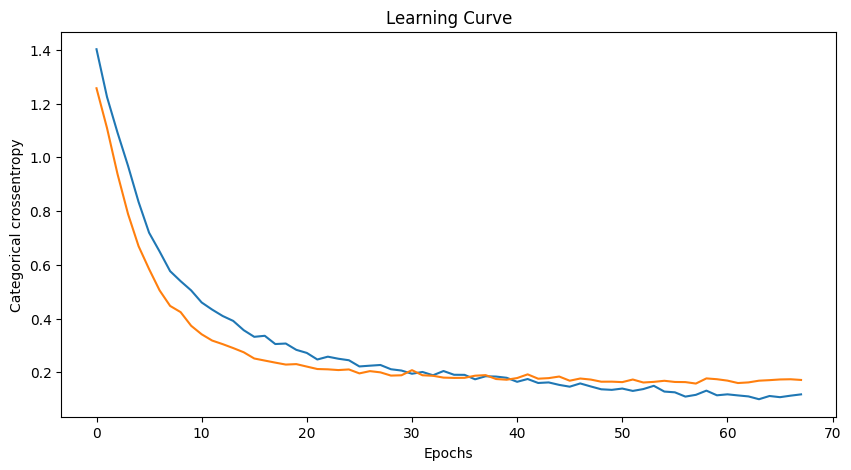

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Trainingloss')
plt.plot(hist.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical crossentropy')
plt.title('Learning Curve')
plt.show()

In [ ]:
# evaluate model

In [ ]:
 model.evaluate(xtrain,ytrain_cat)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9956 - loss: 0.0311


[0.05568835884332657, 0.9856250286102295]

In [ ]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9366 - loss: 0.1685  


[0.18558265268802643, 0.925000011920929]

In [ ]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
yprob_train[:5]

array([[0.0000000e+00, 4.3714463e-11, 4.8052389e-04, 9.9951941e-01],
       [8.0883283e-26, 6.7990768e-05, 9.8636502e-01, 1.3566970e-02],
       [7.6437146e-07, 9.6620101e-01, 3.3798214e-02, 2.8501457e-10],
       [9.9842834e-01, 1.5715969e-03, 1.9963100e-18, 0.0000000e+00],
       [0.0000000e+00, 6.3641481e-10, 4.1738166e-03, 9.9582624e-01]],
      dtype=float32)

In [ ]:
yprob_test[:5]

array([[9.97529864e-01, 2.47013103e-03, 2.33001745e-18, 0.00000000e+00],
       [4.69188690e-02, 9.53080118e-01, 9.07545541e-07, 5.08339354e-20],
       [9.99889553e-01, 1.10411376e-04, 3.01862087e-25, 0.00000000e+00],
       [1.41299940e-15, 1.06583843e-02, 9.89338100e-01, 3.36767584e-06],
       [6.42213230e-36, 2.09560325e-09, 1.74865767e-03, 9.98251259e-01]],
      dtype=float32)

In [ ]:
import numpy as np

In [ ]:
ypred_train=np.argmax(yprob_train,axis=1)
ypred_test=np.argmax(yprob_test,axis=1)

In [ ]:
ypred_train[:5]

array([3, 2, 1, 0, 3])

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

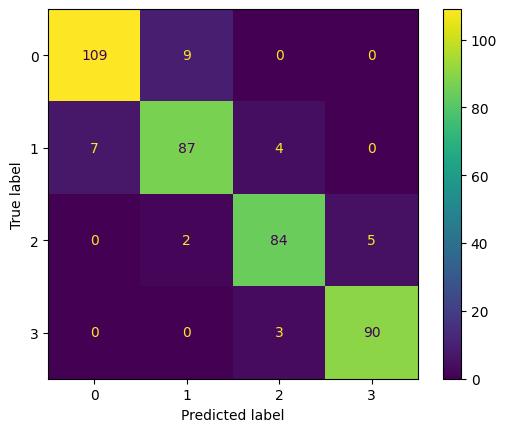

In [ ]:
cf=confusion_matrix(ytest,ypred_test)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

In [ ]:
 model.save('mobile_price.keras')